<a href="https://colab.research.google.com/github/nurulvita/Data-Mining/blob/main/Datmin_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Angka Profitabilitas dan Prediksi Keberhasilan Genre Film dengan Memperhitungkan Faktor-Faktor yang Mempengaruhi**

#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**



Tujuan bisnis dari dataset ini adalah untuk mengoptimalkan investasi di industri film dengan memprediksi potensi genre film dengan tingkat keberhasilan tinggi, dengan fokus pada peningkatan profitabilitas produksi. Dengan menganalisis tren industri film, sejarah profitabilitas film di masa lalu, dan faktor-faktor kunci yang mempengaruhi kesuksesan genre film


##**Assess Situation**




1.   Menganalisis tren industri film saat ini seperti popularitas genre, perubahan selera penonton, dan faktor eksternal yang mempengaruhi industri film.
2.   Analisis profitabilitas film dengan melihat profibilitas film-film sebelumnya serta menganalisis genre yang telah sukses dan tidak sukses secara finansial.



##**Data Mining Goals**




1.   Segmentasi Genre Film: Mengidentifikasi pola dan tren  genre film yang menghasilkan profitabilitas tinggi.
2.   Pemodelan Prediktif: Mengembangkan model prediktif yang memprediksi kesuksesan finansial sebuah film berdasarkan faktor-faktor tertentu.



##**Project Plan**


Langkah pertama dalam proyek ini adalah mengumpulkan data film sebelumnya, termasuk informasi pendapatan kotor, penjualan tiket, dan angka yang disesuaikan dengan inflasi serta data relevan lainnya. Proses pengumpulan ini dilanjutkan dengan pengolahan data, termasuk pembersihan data dan pengintegrasian informasi dari berbagai sumber untuk menjamin kualitas dan konsistensi data. Analisis statistik kemudian dilakukan  untuk menilai tren dan korelasi  antara faktor-faktor yang mempengaruhi kesuksesan film. Dengan menggunakan teknik penambangan data, model prediktif telah dikembangkan yang dapat memprediksi keberhasilan suatu genre film berdasarkan faktor-faktor yang  diidentifikasi. Validasi model dilakukan melalui pengujian terhadap data film yang tidak terlibat dalam pengembangan model. Selain itu, model prediktif digunakan dalam  keputusan investasi di industri film. Evaluasi rutin dilakukan untuk memastikan bahwa model tersebut tetap relevan dan diperbarui sebagai respons terhadap perubahan tren industri dan faktor lain yang memengaruhi kesuksesan sebuah film.








#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber Dataset :
[Dataset Film Genre](https://www.kaggle.com/datasets/thedevastator/film-genre-statistics)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nurulvita/Data-Mining/main/ThrowbackDataThursday%20Week%2011%20-%20Film%20Genre%20Stats.csv')

In [ ]:
df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


##**Describe Data**

####Informasi Dasar

In [ ]:
df

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


In [ ]:
df.shape

(300, 10)

Dataset ini terdapat 300 baris dan 10 kolom yang berisi 299 data

####Informasi Lanjutan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           300 non-null    int64  
 1   Genre                                           300 non-null    object 
 2   Year                                            300 non-null    int64  
 3   Movies Released                                 300 non-null    int64  
 4   Gross                                           300 non-null    int64  
 5   Tickets Sold                                    300 non-null    int64  
 6   Inflation-Adjusted Gross                        300 non-null    int64  
 7   Top Movie                                       300 non-null    object 
 8   Top Movie Gross (That Year)                     300 non-null    int64  
 9   Top Movie Inflation-Adjusted Gross (That Ye


1.   Genre : Kategori atau jenis film. (String)
2.   Year : Tahun saat film dirilis. (Integer)
3.   Movie Released : Jumlah film yang dirilis dalam genre dan tahun tertentu. (Integer)
4.   Gross : Total pendapatan kotor yang dihasilkan oleh film dalam genre dan tahun tersebut. (Integer)
5.   Tickets Sold : Jumlah total tiket yang terjual untuk film dalam genre dan tahun tersebut. (Integer)
6.   Inflation-Adjusted Gross : Pendapatan kotor yang disesuaikan dengan inflasi, dengan mempertimbangkan perubahan nilai uang dari waktu ke waktu. (Integer)
7.   Top Movie : Judul film dengan pendapatan kotor tertinggi dalam genre dan tahun tersebut. (String)
8. Top Movie Gross : Pendapatan kotor yang dihasilkan oleh film dengan pendapatan kotor tertinggi dalam genre dan tahun tersebut. (Integer)
9.  Top Movie Inflation-Adjusted Gross : Pendapatan kotor film terlaris yang disesuaikan dengan inflasi dalam genre dan tahun tersebut. (Float)

In [ ]:
total = df['Tickets Sold'].sum()
total

32362307172

In [ ]:
data = pd.DataFrame(df)
data

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


####Informasi Statistik Deskriptif

In [ ]:
df.describe()

,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


In [ ]:
df.corr(numeric_only=True)

,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,1.000000,0.170804,-0.452522,-0.826705,-0.873588,-0.873588,-0.739793,-0.796852
Year,0.170804,1.000000,0.157161,0.105170,-0.089789,-0.089789,0.135810,-0.092884
Movies Released,-0.452522,0.157161,1.000000,0.412978,0.401281,0.401281,0.235386,0.210184
Gross,-0.826705,0.105170,0.412978,1.000000,0.955279,0.955279,0.857945,0.809520
Tickets Sold,-0.873588,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Inflation-Adjusted Gross,-0.873588,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Top Movie Gross (That Year),-0.739793,0.135810,0.235386,0.857945,0.802512,0.802512,1.000000,0.945117
Top Movie Inflation-Adjusted Gross (That Year),-0.796852,-0.092884,0.210184,0.809520,0.843960,0.843960,0.945117,1.000000


Korelasi :


*   Gross dan Tickets Sold: Korelasi ini menunjukkan hubungan positif yang kuat (0,955279) antara pendapatan kotor film dan jumlah tiket yang terjual. Hal ini menunjukkan bahwa semakin banyak tiket yang terjual, semakin tinggi pendapatan kotor film.
*   Gross dan Inflation-Adjusted Gross: Korelasi ini menunjukkan hubungan positif yang kuat (0,955279) antara pendapatan kotor film dan pendapatan kotor film yang disesuaikan dengan inflasi. Hal ini menunjukkan bahwa pendapatan kotor film meningkat seiring waktu ketika inflasi diperhitungkan.
*   Tickets Sold dan Inflation-Adjusted Gross: Korelasi ini menunjukkan hubungan positif yang kuat (1,000000) antara jumlah tiket yang terjual dan pendapatan kotor film yang disesuaikan dengan inflasi. Hal ini menunjukkan bahwa semakin banyak tiket yang terjual, semakin tinggi pendapatan kotor film, bahkan ketika inflasi diperhitungkan.
*   Top Movie Gross (That Year) dan Gross (That Year): Korelasi ini menunjukkan hubungan positif yang kuat (0,857945) antara pendapatan kotor film terlaris pada tahun itu dan pendapatan kotor total film pada tahun itu. Hal ini menunjukkan bahwa ketika film terlaris menghasilkan banyak uang, film lain pada tahun itu juga cenderung menghasilkan banyak uang.
*   Top Movie Inflation-Adjusted Gross (That Year) dan Gross (That Year): Korelasi ini menunjukkan hubungan positif yang kuat (0,843960) antara pendapatan kotor film terlaris pada tahun itu yang disesuaikan dengan inflasi dan pendapatan kotor total film pada tahun itu. Hal ini menunjukkan bahwa ketika film terlaris menghasilkan banyak uang, even when adjusted for inflation, other films that year also tend to make more money.

* Top Movie Gross and Top Movie Inflation-Adjusted Gross : Korelasi positif kuat (1,000000) menunjukkan bahwa film dengan pendapatan kotor tertinggi dalam satu tahun biasanya juga memiliki pendapatan kotor yang disesuaikan inflasi tertinggi.

##**Exploratory Data Analysis**

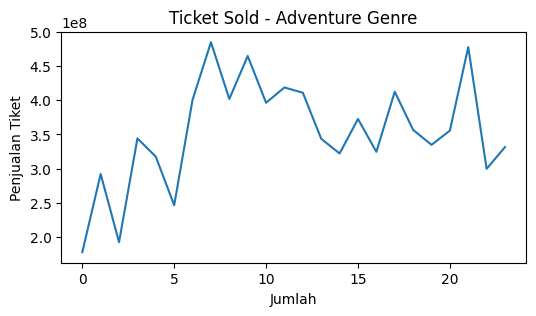

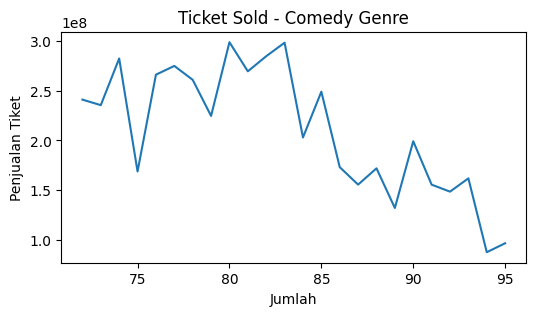

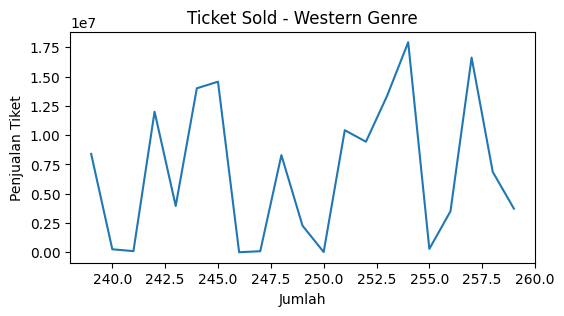

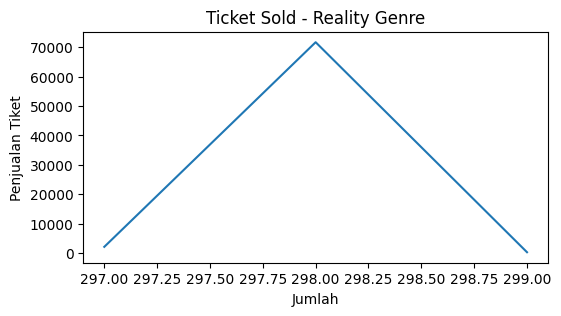

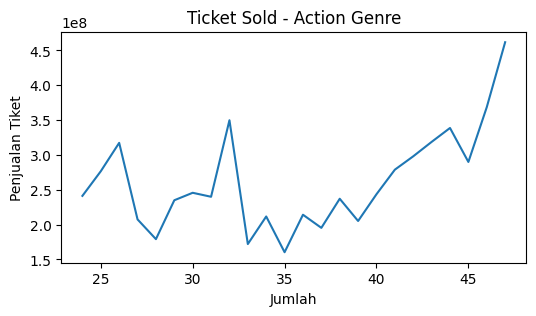

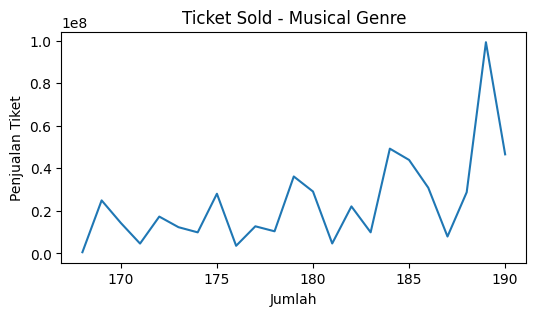

In [ ]:
def plot_genre(data, genre):
    genre_data = data[data['Genre'] == genre]
    genre_data['Tickets Sold'].plot(kind='line', figsize=(6, 3), title=f'Ticket Sold - {genre} Genre')
    plt.gca().spines[['top', 'right']].set_visible(True)
    plt.xlabel('Jumlah')
    plt.ylabel('Penjualan Tiket')
    plt.show()

selected_genres = ['Adventure', 'Comedy', 'Western', 'Reality','Action', 'Musical']

for genre in selected_genres:
    plot_genre(data, genre)

Grafik diatas menunjukkan hasil tiket yang terjual berdasarkan beberapa genre film yang terdapat dalam dataset. Terlihat dari grafik untuk genre 'Reality' memiliki garis lurus saja dan mengalami penurunan. Film dengan genre 'Reality' hanya didistribusikan pada tahun 2014, 2015 dan 2018 saja karena kurangnya ketertarikan oleh penonton film pada genre ini.

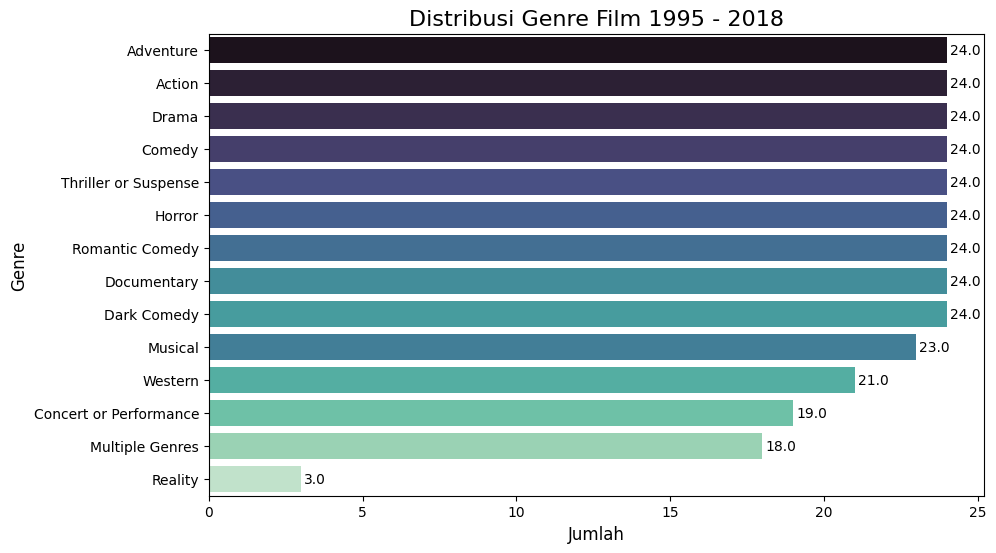

In [ ]:
color_palette = sns.color_palette("mako", n_colors=len(data['Genre'].unique()))

plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Genre', data=data, palette=color_palette, hue='Genre', order=data['Genre'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Distribusi Genre Film 1995 - 2018', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.show()

Visualisasi data diatas menunjukkan bahwa genre film yang paling umum didistribusikan dari tahun 1995 - 2018 adalah genre yang menarik bagi khalayak luas. Genre ini termasuk film petualangan, aksi, drama, komedi, dan thriller atau ketegangan, horor, komedi romantis dan film dokumenter. Genre film yang paling sedikit didistribusikan adalah genre yang menarik bagi khalayak yang lebih kecil. Genre ini termasuk film realita.

##**Verify Data Quality**

####Missing Values

In [ ]:
pd.DataFrame(df.isna().sum()/len(df)* 100, columns=['Null Ratio %'])

,Null Ratio %
index,0.0
Genre,0.0
Year,0.0
Movies Released,0.0
Gross,0.0
Tickets Sold,0.0
Inflation-Adjusted Gross,0.0
Top Movie,0.0
Top Movie Gross (That Year),0.0
Top Movie Inflation-Adjusted Gross (That Year),0.0


Semua kolom memiliki rasio null 0%, yang berarti tidak ada data yang kosong

In [ ]:
df.isna().sum()

index                                             0
Genre                                             0
Year                                              0
Movies Released                                   0
Gross                                             0
Tickets Sold                                      0
Inflation-Adjusted Gross                          0
Top Movie                                         0
Top Movie Gross (That Year)                       0
Top Movie Inflation-Adjusted Gross (That Year)    0
dtype: int64

Hasilnya menunjukkan bahwa tidak ada nilai NaN di kolom mana pun.

####Outliers Values

In [ ]:
fig = px.scatter(df, x='Top Movie Gross (That Year)', y='Gross', color='Genre', title='Hasil Pendapatan Kotor yang dihasilkan oleh genre film tiap tahun (1995 - 2018).',
                 labels={'Top Movie Gross (That Year)': 'Top Movie Gross', 'Gross': 'Gross', 'Genre': 'Genre'})
fig.update_layout(xaxis_title='Top Movie Gross (That Year)', yaxis_title='Gross')

fig.show()

Berdasarkan visualisasi diatas dapat diambil kesimpulan yaitu terdapat outliers pada hasil pendapatan kotor berdasarkan genre film. Nilai yang ada di outliers yaitu genre 'Action' dan ' Adventure' yang memiliki pendapatan kotor jauh lebih tinggi dibandingkan genre lain dalam dataset.

####Duplicated Values

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

Berdasarkan analisis awal terhadap data di atas, dapat disimpulkan bahwa data tersebut menunjukkan kualitas yang baik karena tidak mengandung nilai yang kosong atau duplikat.

# **Data Cleaning**



In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/ThrowbackDataThursday Week 11 - Film Genre Stats.csv')
df5.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


###**Penanganan Missing Value**

#####**Pengecekkan Missing Values**

In [ ]:
print((df5.isna().sum() / len(df5)) * 100)

index                                             0.0
Genre                                             0.0
Year                                              0.0
Movies Released                                   0.0
Gross                                             0.0
Tickets Sold                                      0.0
Inflation-Adjusted Gross                          0.0
Top Movie                                         0.0
Top Movie Gross (That Year)                       0.0
Top Movie Inflation-Adjusted Gross (That Year)    0.0
dtype: float64


Pada dataset ini tidak terdapat data yang kosong

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df5.isna().sum() / len(df5) * 100, columns=['Null Ratio %'])

,Null Ratio %
index,0.0
Genre,0.0
Year,0.0
Movies Released,0.0
Gross,0.0
Tickets Sold,0.0
Inflation-Adjusted Gross,0.0
Top Movie,0.0
Top Movie Gross (That Year),0.0
Top Movie Inflation-Adjusted Gross (That Year),0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df5[df5.duplicated()]

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)


Pada dataset ini tidak terdapat nilai yang terduplikat

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df5.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df5[col].quantile(0.25)
  q3 = df5[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df5))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
index,0.000000
Year,0.000000
Movies Released,9.666667
Gross,1.666667
Tickets Sold,1.333333
Inflation-Adjusted Gross,1.333333
Top Movie Gross (That Year),3.666667
Top Movie Inflation-Adjusted Gross (That Year),2.000000


In [ ]:
fig = px.bar(results_df, x='Persentase Outliers', orientation='h', color='Persentase Outliers',
             labels={'Persentase Outliers': 'Percentage Outliers (%)'},
             title='Percentage of Outliers in Each Numerical Column')

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
melted_df = df5.melt(value_vars=df5.columns, var_name='Column', value_name='Value')

fig = px.box(melted_df, x='Column', y='Value',
             title='Box Plot for Each Numerical Column with Outlier Percentage',
             labels={'Column': 'Column', 'Value': 'Value'},
             template='plotly_white')

fig.update_xaxes(tickangle=45)

# Add annotations for percentage of outliers
for col, percentage in zip(results_df.index, results_df['Persentase Outliers']):
    col_values = df5[col].tolist()
    outliers = results_df.loc[col, 'Persentase Outliers']
    max_value = max(col_values)

    fig.add_annotation(
        x=col,
        y=max_value,
        text=f"{outliers:.2f}% Outliers",
        showarrow=True,
        arrowhead=2,
        arrowcolor='red',
        ax=0,
        ay=-40
    )

fig.show()


# **Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
#rata2 penjualan tiket
average = df5['Tickets Sold'].mean()
print(average)

107874357.24


In [ ]:
def popularity_film(Tickets_Sold):
    if Tickets_Sold < 100000:
        return 'Unpopular'
    elif 100000 <= Tickets_Sold < 1000000:
        return 'Popular'
    else:
        return 'Very Popular'

df5['Popularity Genre Film'] = df5['Tickets Sold'].apply(popularity_film)


In [ ]:
df5

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year),Popularity Genre Film
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08,Very Popular
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08,Very Popular
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08,Very Popular
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08,Very Popular
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08,Very Popular
...,...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06,Popular
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06,Popular
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04,Unpopular
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05,Unpopular


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_corr = df5.corr(numeric_only=True)
px.imshow(df_corr)

In [ ]:
df5 = df5.drop(['index', 'Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)'], axis=1)

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Popularity Genre Film
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,Very Popular
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,Very Popular
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,Very Popular
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,Very Popular
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,Very Popular




*   Top Movie Gross (That Year): Fitur ini tidak relevan karena hanya memberikan
informasi tentang film dengan pendapatan kotor tertinggi pada tahun tersebut, bukan tentang performa film secara keseluruhan.
*   Top Movie Inflation-Adjusted Gross (That Year): Fitur ini tidak relevan karena hanya memberikan informasi tentang film dengan pendapatan kotor yang disesuaikan dengan inflasi tertinggi pada tahun tersebut, bukan tentang performa film secara keseluruhan.







###**Pengecekkan Hasil**

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Popularity Genre Film
0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,Very Popular
1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,Very Popular
2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,Very Popular
3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,Very Popular
4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,Very Popular


#**Data Transformation**

###**Mapping**

In [ ]:
df5['Genre'].value_counts()

Adventure                 24
Action                    24
Drama                     24
Comedy                    24
Thriller or Suspense      24
Horror                    24
Romantic Comedy           24
Documentary               24
Dark Comedy               24
Musical                   23
Western                   21
Concert or Performance    19
Multiple Genres           18
Reality                    3
Name: Genre, dtype: int64

In [ ]:
df5['Genre'] = df5['Genre'].map({'Adventure':0,'Action':1, 'Drama':2, 'Comedy':3, 'Thriller or Suspense':4,
                               'Horror':5, 'Romantic Comedy':6, 'Documentary':7, 'Dark Comedy':8, 'Musical':9,
                               'Western':10, 'Concert or Performance':11, 'Multiple Genres':12, 'Reality':13})
df5['Popularity Genre Film'] = df5['Popularity Genre Film'].map({'Very Popular': 1, 'Popular': 2,'Unpopular': 3}).astype(int)

In [ ]:
df5

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Popularity Genre Film
0,0,1995,29,771507571,177358047,1590901682,Toy Story,1
1,0,1996,34,1290490033,291966054,2618935504,Independence Day,1
2,0,1997,23,881902843,192135684,1723457085,Men in Black,1
3,0,1998,29,1614467732,344236174,3087798481,Armageddon,1
4,0,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,1
...,...,...,...,...,...,...,...,...
295,12,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2
296,12,2018,3,4787450,533717,4787441,2018 Oscar Shorts,2
297,13,2014,1,16826,2059,18469,The Principle,3
298,13,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,3




Baris pertama membuat kolom baru bernama 'Popularitas Genre Film' dalam dataframe. Nilai untuk kolom baru ini ditetapkan berdasarkan pemetaan.

Pemetaan ini memetakan nilai dalam kolom 'Genre' ke nilai numerik. Misalnya, 'Adventure' dipetakan ke 0, 'Action' dipetakan ke 1, dan seterusnya. Pemetaan  Pada kolom genre yaitu

1. Adventure : 0
2. Action : 1
3. Drama : 2
4. Comedy : 3
5. Thriller or Suspense : 4
6. Horror : 5
7. Romantic Comedy : 6
8. Documentary : 7
9. Dark Comedy : 8
10. Musical : 9
11. Western : 10
12. Concert or Performance : 11
13. Multiple Genres : 12
14. Reality :13

Pemetaan kedua nilai dalam kolom bernama 'Popularitas Genre Film' ke nilai
numerik. Kamus pemetaan di sini mengkategorikan popularitas genre menjadi tiga kategori: 'Very Popular (dipetakan ke 1), Popular (dipetakan ke 2), dan Unpopular(dipetakan ke 3).
1. Very Popular : 1
2. Popular : 2
3. Unpopular : 3

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Popularity Genre Film
0,0,1995,29,771507571,177358047,1590901682,Toy Story,1
1,0,1996,34,1290490033,291966054,2618935504,Independence Day,1
2,0,1997,23,881902843,192135684,1723457085,Men in Black,1
3,0,1998,29,1614467732,344236174,3087798481,Armageddon,1
4,0,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,1


###**Encoding**

In [ ]:
df5 = pd.get_dummies(df5)

###**Pengecekkan Hasil**

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film,Top Movie_2006 Academy Award Nominated Short Films,Top Movie_2009 Oscar Shorts,Top Movie_2010 Oscar Shorts,...,Top Movie_What Happens in Vegas...,Top Movie_What Lies Beneath,Top Movie_What Women Want,Top Movie_When We Were Kings,Top Movie_While You Were Sleeping,Top Movie_Wild Hogs,Top Movie_Wonder Woman,Top Movie_Won’t You Be My Neighbor?,Top Movie_X-Men: The Last Stand,Top Movie_You Kill Me
0,0,1995,29,771507571,177358047,1590901682,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1996,34,1290490033,291966054,2618935504,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1997,23,881902843,192135684,1723457085,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1998,29,1614467732,344236174,3087798481,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1999,27,1612432107,317407880,2847148684,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fungsi pd.get_dummies() mengambil kolom kategorikal sebagai input dan mengembalikan DataFrame baru dengan satu kolom baru untuk setiap kategori yang mungkin dalam kolom asli. Kolom baru ini adalah kolom biner, dengan nilai 1 jika kategori tersebut ada di baris dan 0 jika tidak.

In [ ]:
df5.to_csv('Data Cleaned.csv')

In [ ]:
df5 = pd.read_csv('Data Cleaned.csv')
df5

,Unnamed: 0.1,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film,Top Movie_2006 Academy Award Nominated Short Films,...,Top Movie_What Happens in Vegas...,Top Movie_What Lies Beneath,Top Movie_What Women Want,Top Movie_When We Were Kings,Top Movie_While You Were Sleeping,Top Movie_Wild Hogs,Top Movie_Wonder Woman,Top Movie_Won’t You Be My Neighbor?,Top Movie_X-Men: The Last Stand,Top Movie_You Kill Me
0,0,0,0,1995,29,771507571,177358047,1590901682,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1996,34,1290490033,291966054,2618935504,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,1997,23,881902843,192135684,1723457085,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,1998,29,1614467732,344236174,3087798481,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,1999,27,1612432107,317407880,2847148684,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,12,2017,5,4614134,514394,4614114,2,0,...,0,0,0,0,0,0,0,0,0,0
296,296,296,12,2018,3,4787450,533717,4787441,2,0,...,0,0,0,0,0,0,0,0,0,0
297,297,297,13,2014,1,16826,2059,18469,3,0,...,0,0,0,0,0,0,0,0,0,0
298,298,298,13,2015,3,604870,71751,643606,3,0,...,0,0,0,0,0,0,0,0,0,0


# **Modelling**

**Import Library**

**Core Library**

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Library untuk Splitting Data**

In [2]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [3]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

### **Ket : Melakukan cleaning ulang dengan menghapus kolom "Top Movie"**

Alasannya dikarenakan terlalu banyak data dummiesnya yang berasal dari kolom top movie dan tidak diperlukan.

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Popularity Genre Film
0,0,1995,29,771507571,177358047,1590901682,Toy Story,1
1,0,1996,34,1290490033,291966054,2618935504,Independence Day,1
2,0,1997,23,881902843,192135684,1723457085,Men in Black,1
3,0,1998,29,1614467732,344236174,3087798481,Armageddon,1
4,0,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,1


In [ ]:
df5 = df5.drop("Top Movie", axis=1)

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film
0,0,1995,29,771507571,177358047,1590901682,1
1,0,1996,34,1290490033,291966054,2618935504,1
2,0,1997,23,881902843,192135684,1723457085,1
3,0,1998,29,1614467732,344236174,3087798481,1
4,0,1999,27,1612432107,317407880,2847148684,1


In [ ]:
df5 = pd.get_dummies(df5)

In [ ]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film
0,0,1995,29,771507571,177358047,1590901682,1
1,0,1996,34,1290490033,291966054,2618935504,1
2,0,1997,23,881902843,192135684,1723457085,1
3,0,1998,29,1614467732,344236174,3087798481,1
4,0,1999,27,1612432107,317407880,2847148684,1


In [ ]:
df5.to_csv('Data Cleaned.csv')

In [ ]:
df5 = pd.read_csv('Data Cleaned.csv')
df5

,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film
0,0,0,1995,29,771507571,177358047,1590901682,1
1,1,0,1996,34,1290490033,291966054,2618935504,1
2,2,0,1997,23,881902843,192135684,1723457085,1
3,3,0,1998,29,1614467732,344236174,3087798481,1
4,4,0,1999,27,1612432107,317407880,2847148684,1
...,...,...,...,...,...,...,...,...
295,295,12,2017,5,4614134,514394,4614114,2
296,296,12,2018,3,4787450,533717,4787441,2
297,297,13,2014,1,16826,2059,18469,3
298,298,13,2015,3,604870,71751,643606,3


#**Inisiasi Variabel untuk menyimpan Dataframe**

In [53]:
df6 = pd.read_csv('https://raw.githubusercontent.com/nurulvita/Data-Mining/main/Data%20Cleaned%20(2).csv')

In [54]:
df6

,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Popularity Genre Film
0,0,0,1995,29,771507571,177358047,1590901682,1
1,1,0,1996,34,1290490033,291966054,2618935504,1
2,2,0,1997,23,881902843,192135684,1723457085,1
3,3,0,1998,29,1614467732,344236174,3087798481,1
4,4,0,1999,27,1612432107,317407880,2847148684,1
...,...,...,...,...,...,...,...,...
295,295,12,2017,5,4614134,514394,4614114,2
296,296,12,2018,3,4787450,533717,4787441,2
297,297,13,2014,1,16826,2059,18469,3
298,298,13,2015,3,604870,71751,643606,3


#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [179]:
x_final = df6.drop("Popularity Genre Film", axis=1)

Baris ini menghapus kolom "Popularity Genre Film" dari dataframe. Hal ini dilakukan karena kolom tersebut tidak relevan dengan model yang akan dibuat.

#####**Normalisasi Data**

In [180]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

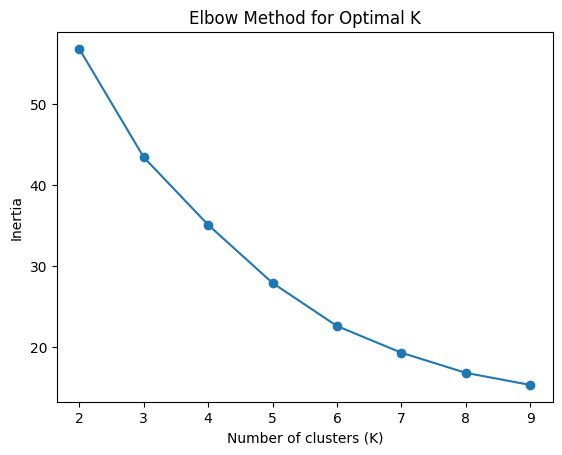

In [181]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Titik siku adalah di mana kurva mulai mendatar.
Jumlah cluster optimal (K) adalah nilai K yang sesuai dengan titik siku.

**Pada gambar, titik siku terletak di K = 3. Ini menunjukkan bahwa jumlah cluster optimal untuk data ini adalah 3.**

###**Build Model**

#####**K-Means**

In [182]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

n_clusters = 3 diambil dari elbow method pada grafik diatas dengan patahan sikunya

#####**Hierarchical Clustering**

In [184]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

In [185]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [186]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [187]:
combined_data_assoc.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,kmeans_cluster,hierarchy_cluster
0,0,1995,29,771507571,177358047,1590901682,2,0
1,0,1996,34,1290490033,291966054,2618935504,2,0
2,0,1997,23,881902843,192135684,1723457085,2,0
3,0,1998,29,1614467732,344236174,3087798481,2,0
4,0,1999,27,1612432107,317407880,2847148684,2,0


In [192]:
combined_data_assoc.sample(10)

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,kmeans_cluster,hierarchy_cluster
229,8,2009,9,54671157,7289484,65386671,1,1
253,10,2012,2,106297399,13353944,119784878,1,1
144,6,1995,16,297177737,68316713,612800916,0,2
130,5,2005,30,587908674,91717406,822705132,0,1
151,6,2002,24,574879303,98946512,887550213,0,2
70,2,2017,253,1326577328,147890338,1326576332,2,0
54,2,2001,151,1377189931,243319703,2182577736,2,0
52,2,1999,133,1458861532,287177397,2575981251,2,0
10,0,2005,43,2541162317,396437158,3556041307,2,0
284,12,2006,3,748135,114218,1024535,0,1


**Algoritma Pengelompokan:**

*   K-means: Membagi data menjadi kelompok berdasarkan jarak antar data.
*   Hierarki: Membangun struktur hierarki berdasarkan kesamaan antar data.

**Hubungan antara cluster dan kolom:**

- Algoritma k-means dan hierarchical clustering mengelompokkan film berdasarkan
kesamaan karakteristiknya. Dalam hal ini, film dikelompokkan berdasarkan genre, tahun rilis, pendapatan kotor, dan jumlah tiket yang terjual.
- Cluster yang berbeda menunjukkan bahwa terdapat perbedaan karakteristik film dalam cluster tersebut. Contohnya, cluster 0 berisi film drama dan komedi yang baru dirilis, sedangkan cluster 2 berisi film action yang lebih lama.

Perbedaan nilai cluster pada tabel menunjukkan bahwa data film dikelompokkan secara berbeda berdasarkan algoritma dan parameter yang digunakan.

In [188]:
kmeans_clust

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [189]:
hierarchy_clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

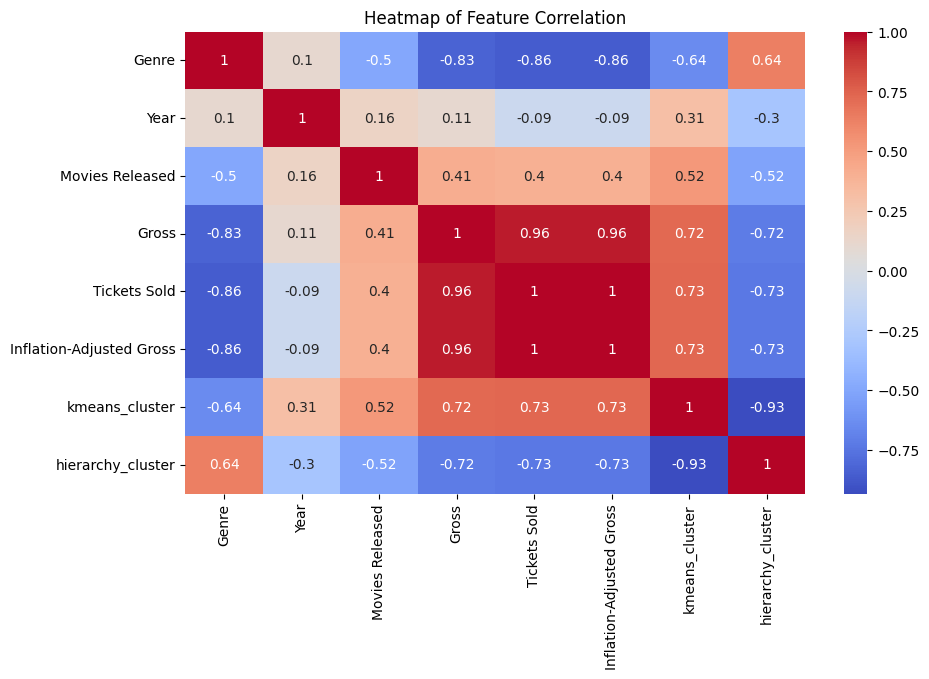

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt


# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data_assoc.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlation')
plt.show()


**Merah: Korelasi positif yang kuat (nilai mendekati 1)**

**Biru: Korelasi negatif yang kuat (nilai mendekati -1)**

**Oren: Korelasi positif yang lemah (nilai mendekati 0)**

**Kuning: Korelasi negatif yang lemah (nilai mendekati 0)**

Hasil dan Kesimpulan:

Nilai-nilai dalam Heatmap berkisar antara -1 hingga 1, dengan -1 menunjukkan korelasi negatif sempurna, 0 menunjukkan tidak ada korelasi, dan 1 menunjukkan korelasi positif sempurna. Semakin dalam warnanya, semakin kuat korelasinya.



* Ada korelasi positif yang kuat antara Tiket Terjual dan Kotor (0,96). Ini menunjukkan bahwa semakin tinggi pendapatan kotor film, semakin banyak tiket yang terjual.
* Ada korelasi positif yang kuat antara Tiket Terjual dan Kotor yang Disesuaikan dengan Inflasi (1). Ini menunjukkan bahwa semakin tinggi pendapatan kotor film setelah disesuaikan dengan inflasi, semakin banyak tiket yang terjual.
* Ada korelasi negatif yang kuat antara Tiket Terjual dan Tahun (-0,83). Ini menunjukkan bahwa semakin tua filmnya, semakin sedikit tiket yang terjual.
* Ada korelasi negatif yang kuat antara Tiket Terjual dan Genre (-0,86). Ini menunjukkan bahwa film dalam genre tertentu (mungkin film horor atau aksi) cenderung menjual lebih banyak tiket daripada film dalam genre lain.


#**Modelling Predict**

Model prediktif adalah model yang dapat digunakan untuk memprediksi nilai di masa depan berdasarkan data di masa lalu.
Model prediktif dapat digunakan pada dataset ini untuk tujuan:



*   Memprediksi genre film yang akan sukses: Model prediktif dapat digunakan untuk
menganalisis data film dan mengidentifikasi faktor-faktor yang berkontribusi pada kesuksesan film. Informasi ini dapat digunakan oleh studio film untuk memutuskan jenis film apa yang akan dibuat.
*   Menganalisis tren dalam industri film: Model prediktif dapat digunakan untuk menganalisis data film dan mengidentifikasi tren dalam industri film. Informasi ini dapat digunakan oleh studio film untuk membuat keputusan bisnis yang lebih baik.
*   Memprediksi pendapatan box office film: Model prediktif dapat digunakan untuk memprediksi pendapatan box office film berdasarkan informasi lain tentang film, seperti genre, tahun rilis

###**Pre-Processing**

#####**Split Data**

In [55]:
df6 = df6.drop("Unnamed: 0", axis=1)

Di sini menggunakan drop() untuk menghapus kolom "Unnamed: 0" dari DataFrame df6. Dalam kasus ini, kolom ini tidak diperlukan dalam analisis data sehingga dihapus.

In [193]:
x = df6.drop('Tickets Sold', axis=1)
y = df6['Genre']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Split data digunakan untuk menganalisis data tentang genre film dengan membagi data menjadi dua set, set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model, dan set pengujian digunakan untuk menguji model.


---

x = df6.drop('Tickets Sold', axis=1): Baris ini mengambil seluruh kolom dari dataframe kecuali kolom 'Tickets Sold' dan menyimpannya dalam variabel x. Ini berarti x akan berisi semua fitur (variabel independen) yang akan digunakan untuk memprediksi 'Genre'.

y = df6['Genre']: Baris ini mengambil kolom 'Genre' dari dataframe df6 dan menyimpannya dalam variabel y. Ini adalah variabel target yang ingin diprediksi.

#####**Normalisasi Data**

In [196]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

normalisasi data menggunakan Min-Max Scaling menggunakan MinMaxScaler dari library scikit-learn (sklearn.preprocessing). Normalisasi data adalah proses untuk mengubah rentang nilai dari fitur-fitur dalam dataset sehingga mereka dapat memiliki skala yang seragam.

###**Build and Train Model**

Dalam modelling ini, algoritma yang digunakan adalah :


1. **GNB** : dapat digunakan untuk klasifikasi genre film dengan menghitung probabilitas film baru termasuk dalam setiap genre. Genre dengan probabilitas tertinggi akan menjadi genre film baru tersebut.
2. **KNN** : dapat digunakan untuk klasifikasi genre film dengan mencari k film terdekat dari film baru. K film ini kemudian digunakan untuk menentukan genre film baru tersebut.
3. **DTC** dapat digunakan untuk membangun pohon keputusan yang menjelaskan bagaimana genre film diprediksi. DTC dapat membantu pengguna memahami faktor-faktor yang mempengaruhi genre film.

#####**Gaussian Naive Bayes**

In [197]:
gnb = GaussianNB()

gnb.fit(x_train_norm,y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [198]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [199]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [200]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Membuat Prediksi:

gnb_pred, knn_pred, dan dtc_pred digunakan untuk menyimpan prediksi yang dihasilkan oleh model Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier, secara berturut-turut. Prediksi ini dilakukan pada data uji yang telah dinormalisasi (x_test_norm).


In [201]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined__data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Reset Index Data Uji:

Data uji (x_test) dan labelnya (y_test) diubah menjadi DataFrame dan di-reset indeksnya agar sesuai dengan indeks prediksi.

Membuat Kolom Prediksi:

Setiap DataFrame ini diberi nama kolom sesuai dengan model yang bersangkutan (gnb_prediction, knn_prediction, dan dtc_prediction).

In [202]:
combined__data.head()

,Genre,Year,Movies Released,Gross,Inflation-Adjusted Gross,Popularity Genre Film,Genre,gnb_prediction,knn_prediction,dtc_prediction
0,7,2007,109,70753270,92246108,1,7,7,7,7
1,11,2005,3,1154117,1615031,2,11,11,11,11
2,6,2003,25,495065519,736440642,1,6,6,6,6
3,0,2004,47,2887833719,4171315189,1,0,0,0,0
4,8,2013,12,188672454,208166243,1,8,8,9,8


In [203]:
combined__data.sample(10)

,Genre,Year,Movies Released,Gross,Inflation-Adjusted Gross,Popularity Genre Film,Genre,gnb_prediction,knn_prediction,dtc_prediction
21,4,2012,64,1534307056,1728986445,1,4,4,3,4
28,6,2008,25,330849160,348545980,1,6,6,6,6
22,10,2008,4,20317697,20369202,1,10,10,10,10
12,8,1998,6,46315475,88582024,1,8,8,8,8
66,0,2017,44,2687890267,2687890164,1,0,0,0,0
16,12,2011,4,1510823,1708946,2,12,12,12,12
36,0,2002,45,2818919526,4352101018,1,0,0,0,0
75,12,2003,2,498239,741155,3,12,12,12,12
70,4,2007,57,826453022,1077153767,1,4,4,4,4
57,3,2015,121,1293229974,1331620315,1,3,3,3,3


Tabel ini menunjukkan hasil prediksi genre musik oleh tiga classifier yang berbeda. Dari tabel ini, dapat dilihat bahwa Naive Bayes classifier, K-Nearest Neighbors classifier, dan Decision Tree classifier memiliki akurasi yang tinggi dalam memprediksi genre musik.

In [204]:
knn_pred

array([ 7, 11,  6,  0,  9,  9,  7,  4,  1,  9,  9,  2,  8,  1,  9,  8, 12,
        7,  6,  6,  3,  3, 10, 10,  5,  1, 12, 12,  6,  9,  0,  6,  1,  0,
        7,  3,  0,  3,  0,  2,  3,  1, 12,  2,  3,  2,  9,  9,  5,  9,  9,
        5,  9,  4, 12, 12,  5,  3,  7,  1,  9,  2,  0,  9,  9,  1,  0, 10,
        2,  9,  4,  5,  9,  7,  5, 12,  3,  3,  2, 12,  5,  5,  0,  5,  1,
        4,  3,  1,  0,  0])

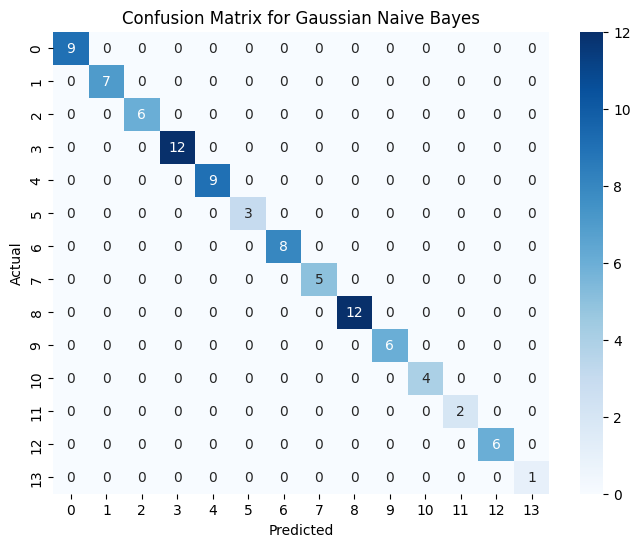

In [205]:
# Confusion Matrix untuk Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, gnb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

Berikut adalah penjelasan lebih rinci tentang confusion matrix diatas:

*   Kelas 1: 9 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
*   Kelas 2: 7 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 3: 6 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 4: 12 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 5: 9 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 6: 3 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 7: 8 instance diklasifikasikan dengan benar, 6 diklasifikasikan salah.
* Kelas 8: 0 instance diklasifikasikan dengan benar, 12 diklasifikasikan salah.
* Kelas 9: 4 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 10: 4 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 11: 2 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 12: 1 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* Kelas 13: 1 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.

Secara keseluruhan, Naive Bayes Gaussian berkinerja baik pada kumpulan data ini, dengan 110 dari 120 instance diklasifikasikan dengan benar.

Kesimpulan :

* Model berkinerja sangat baik dalam mengklasifikasikan kelas 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, dan 13.
* Model berkinerja buruk dalam mengklasifikasikan kelas 7 dan 8.
* Model ini lebih cenderung salah mengklasifikasikan instance kelas 8 sebagai kelas 7 daripada sebaliknya.

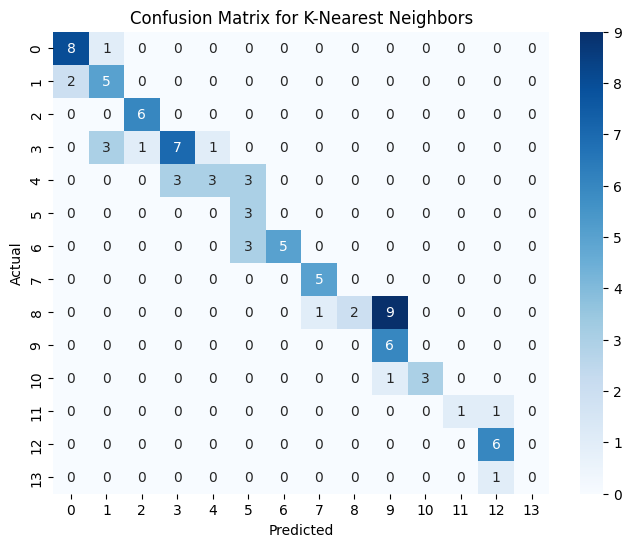

In [206]:
# Confusion Matrix untuk K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, knn_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()



* **Kelas 1:** 8 instance diklasifikasikan dengan benar, 1 diklasifikasikan salah.
* **Kelas 2:** 5 instance diklasifikasikan dengan benar, 2 diklasifikasikan salah.
* **Kelas 3:** 6 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* **Kelas 4:** 3 instance diklasifikasikan dengan benar, 1 diklasifikasikan salah.
* **Kelas 5:** 1 instance diklasifikasikan dengan benar, 0 diklasifikasikan salah.
* **Kelas 6:** 0 instance diklasifikasikan dengan benar, 3 diklasifikasikan salah.
* **Kelas 7:** 7 instance diklasifikasikan dengan benar, 1 diklasifikasikan salah.
* **Kelas 8:** 1 instance diklasifikasikan dengan benar, 7 diklasifikasikan salah.
* **Kelas 9:** 0 instance diklasifikasikan dengan benar, 4 diklasifikasikan salah.
* **Kelas 10:** 0 instance diklasifikasikan dengan benar, 4 diklasifikasikan salah.
* **Kelas 11:** 0 instance diklasifikasikan dengan benar, 2 diklasifikasikan salah.
* **Kelas 12:** 0 instance diklasifikasikan dengan benar, 1 diklasifikasikan salah.
* **Kelas 13:** 0 instance diklasifikasikan dengan benar, 1 diklasifikasikan salah.

Secara keseluruhan, KNN berkinerja cukup baik pada kumpulan data ini, dengan 84 dari 120 instance diklasifikasikan dengan benar.

Berikut adalah beberapa hal yang dapat Anda pelajari dari matriks kebingungan ini:

* Model berkinerja sangat baik dalam mengklasifikasikan kelas 3, 6, dan 7.
* Model berkinerja buruk dalam mengklasifikasikan kelas 8, 9, 10, 11, 12, dan 13.
* Model ini lebih cenderung salah mengklasifikasikan instance kelas 8, 9, 10, 11, 12, dan 13 sebagai kelas lain daripada sebaliknya.


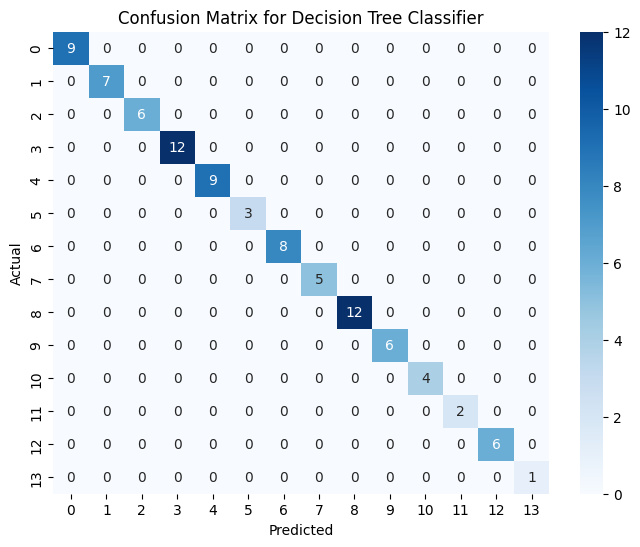

In [207]:
# Confusion Matrix untuk Decision Tree Classifier
cm_dtc = confusion_matrix(y_test, dtc_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [208]:
# Menghitung rata-rata prediksi dari berbagai model
avg_predictions = combined__data[['gnb_prediction', 'knn_prediction', 'dtc_prediction']].mean()

fig = px.bar(x=avg_predictions.index, y=avg_predictions.values,
             title='Average Predictions from Different Models',
             labels={'x': 'Model', 'y': 'Average Predicted Value'})

fig.show()

print("Kesimpulan:")
for model, avg_pred in avg_predictions.items():
    print(f"Rata-rata prediksi dari model {model}: {avg_pred}")


Kesimpulan:
Rata-rata prediksi dari model gnb_prediction: 5.4
Rata-rata prediksi dari model knn_prediction: 5.366666666666666
Rata-rata prediksi dari model dtc_prediction: 5.4


Dengan melihat grafik tersebut, dapat terlihat model mana yang memiliki nilai prediksi rata-rata tertinggi. Dalam kasus ini, dapat dilihat model gnb dan dtc memiliki nilai prediksi rata-rata yang sama.